In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
symbols = ["SPY","TSLA","GOOG","AAPL","MSFT","IBM","LULU","CSCO","SBUX"]
df_source = pd.DataFrame()
for symbol in symbols:
    print(symbol)
    url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1&period2=2695092386&interval=1d&events=history&includeAdjustedClose=true".format(symbol)
    data = pd.read_csv(url, parse_dates=["Date"])
    data["Symbol"] = symbol
    print("Downloded symbol: {}, {} records".format(symbol,len(data)))
    df_source = pd.concat([df_source, pd.DataFrame(data)],ignore_index=True)



SPY
Downloded symbol: SPY, 7714 records
TSLA
Downloded symbol: TSLA, 3328 records
GOOG
Downloded symbol: GOOG, 4803 records
AAPL
Downloded symbol: AAPL, 10781 records
MSFT
Downloded symbol: MSFT, 9455 records
IBM
Downloded symbol: IBM, 13547 records
LULU
Downloded symbol: LULU, 4064 records
CSCO
Downloded symbol: CSCO, 8460 records
SBUX
Downloded symbol: SBUX, 7864 records


In [10]:
display(df_source)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,24.941391,1003200,SPY
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.118803,480500,SPY
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.172003,201300,SPY
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.438093,529400,SPY
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.544535,531500,SPY
...,...,...,...,...,...,...,...,...
70011,2023-09-12,95.500000,96.510002,95.199997,96.239998,96.239998,5007600,SBUX
70012,2023-09-13,96.199997,97.300003,96.040001,96.930000,96.930000,5830200,SBUX
70013,2023-09-14,96.769997,97.779999,96.250000,97.160004,97.160004,6039700,SBUX
70014,2023-09-15,97.250000,97.470001,96.050003,96.230003,96.230003,8766700,SBUX


In [11]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70016 entries, 0 to 70015
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       70016 non-null  datetime64[ns]
 1   Open       70016 non-null  float64       
 2   High       70016 non-null  float64       
 3   Low        70016 non-null  float64       
 4   Close      70016 non-null  float64       
 5   Adj Close  70016 non-null  float64       
 6   Volume     70016 non-null  int64         
 7   Symbol     70016 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 4.3+ MB


In [12]:
df_source.groupby("Symbol").agg({"Date":["min","max","count"]})

Date                  
              min        max  count
Symbol                             
AAPL   1980-12-12 2023-09-18  10781
CSCO   1990-02-16 2023-09-18   8460
GOOG   2004-08-19 2023-09-18   4803
IBM    1970-01-02 2023-09-18  13547
LULU   2007-07-27 2023-09-18   4064
MSFT   1986-03-13 2023-09-18   9455
SBUX   1992-06-26 2023-09-18   7864
SPY    1993-01-29 2023-09-18   7714
TSLA   2010-06-29 2023-09-18   3328

In [14]:
df_daily = pd.pivot(df_source, index="Date", columns="Symbol", values="Close")
display(df_daily)

Symbol,AAPL,CSCO,GOOG,IBM,LULU,MSFT,SBUX,SPY,TSLA
Date,,,,,,,,,
1970-01-02,NaN,NaN,NaN,17.435469,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,17.602772,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,17.614723,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,17.626673,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,17.662523,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-09-12,176.300003,56.389999,136.070007,146.300003,388.119995,331.769989,96.239998,445.989990,267.480011
2023-09-13,174.210007,56.279999,137.500000,146.550003,388.970001,336.059998,96.930000,446.510010,271.299988
2023-09-14,175.740005,56.369999,138.990005,147.350006,388.739990,338.700012,97.160004,450.359985,276.040009


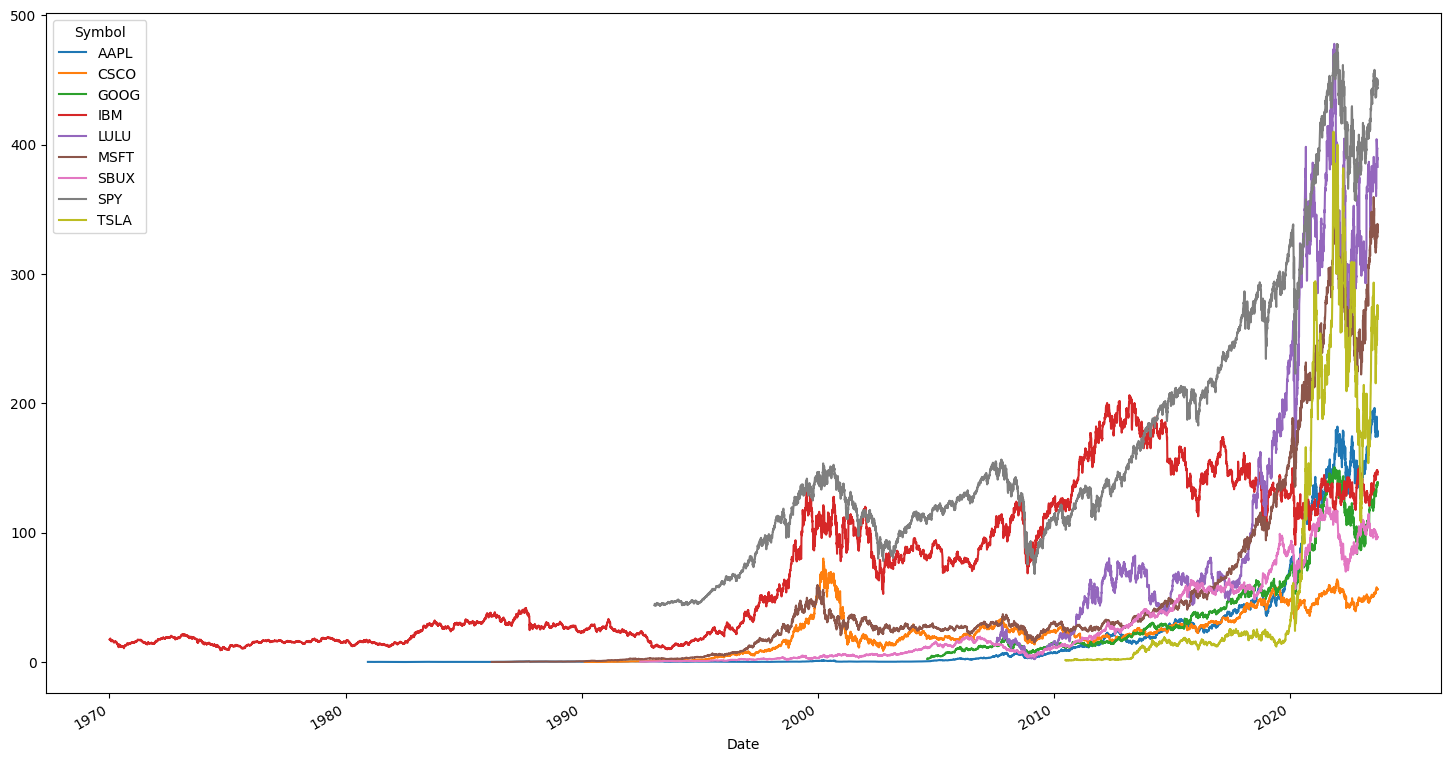

In [17]:
df_daily.plot(figsize=(18,10));

In [37]:
df_sample = df_daily.copy()[df_daily.index.year >= 2015]
display(df_sample)

Symbol,AAPL,CSCO,GOOG,IBM,LULU,MSFT,SBUX,SPY,TSLA
Date,,,,,,,,,
2015-01-02,27.332500,27.610001,26.168653,154.933075,55.340000,46.759998,40.720001,205.429993,14.620667
2015-01-05,26.562500,27.059999,25.623152,152.495224,55.959999,46.330002,39.939999,201.720001,14.006000
2015-01-06,26.565001,27.049999,25.029282,149.206497,55.570000,45.650002,39.615002,199.820007,14.085333
2015-01-07,26.937500,27.299999,24.986401,148.231354,57.650002,46.230000,40.590000,202.309998,14.063333
2015-01-08,27.972500,27.510000,25.065184,151.453156,59.070000,47.590000,41.244999,205.899994,14.041333
...,...,...,...,...,...,...,...,...,...
2023-09-12,176.300003,56.389999,136.070007,146.300003,388.119995,331.769989,96.239998,445.989990,267.480011
2023-09-13,174.210007,56.279999,137.500000,146.550003,388.970001,336.059998,96.930000,446.510010,271.299988
2023-09-14,175.740005,56.369999,138.990005,147.350006,388.739990,338.700012,97.160004,450.359985,276.040009


<Axes: xlabel='Date'>

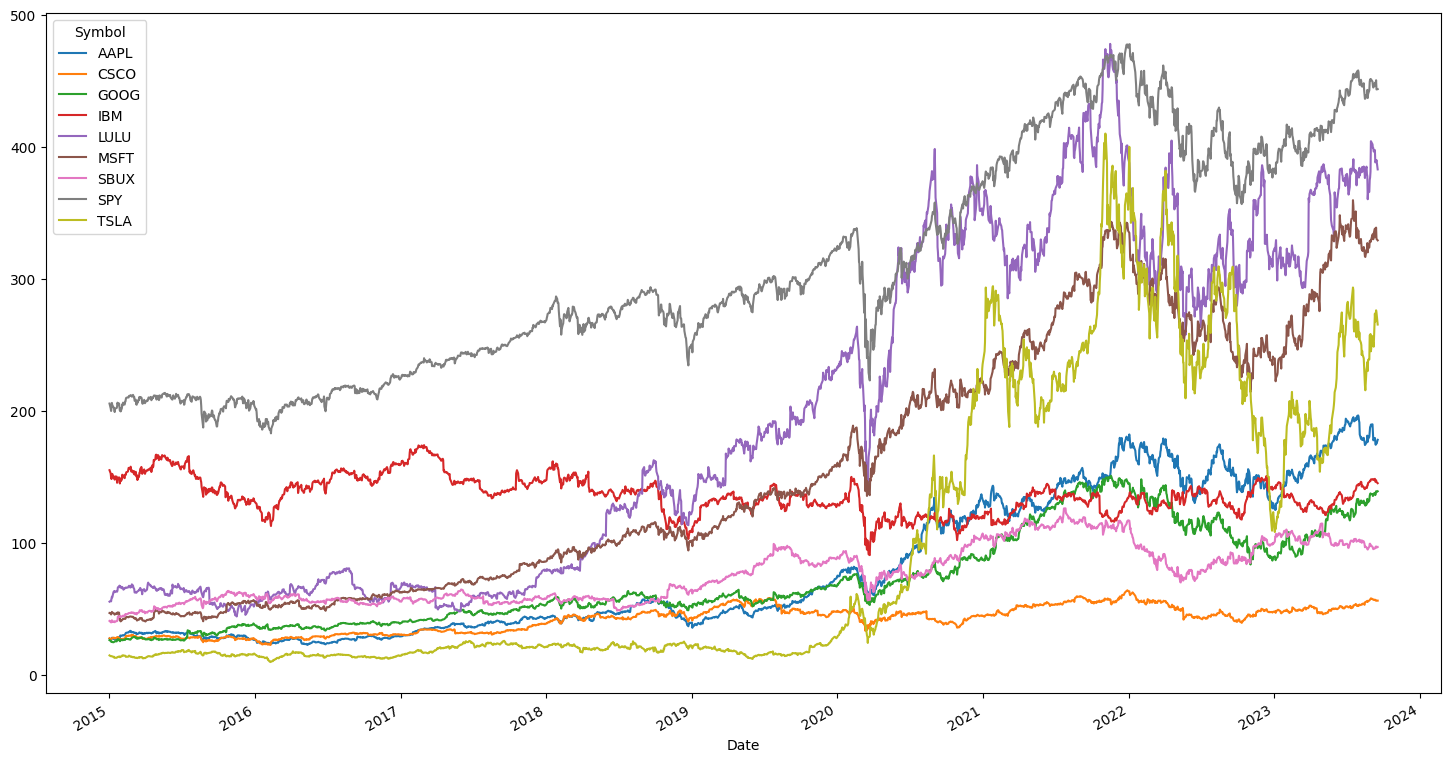

In [38]:
df_sample.plot(figsize=(18,10))

<Axes: xlabel='Date'>

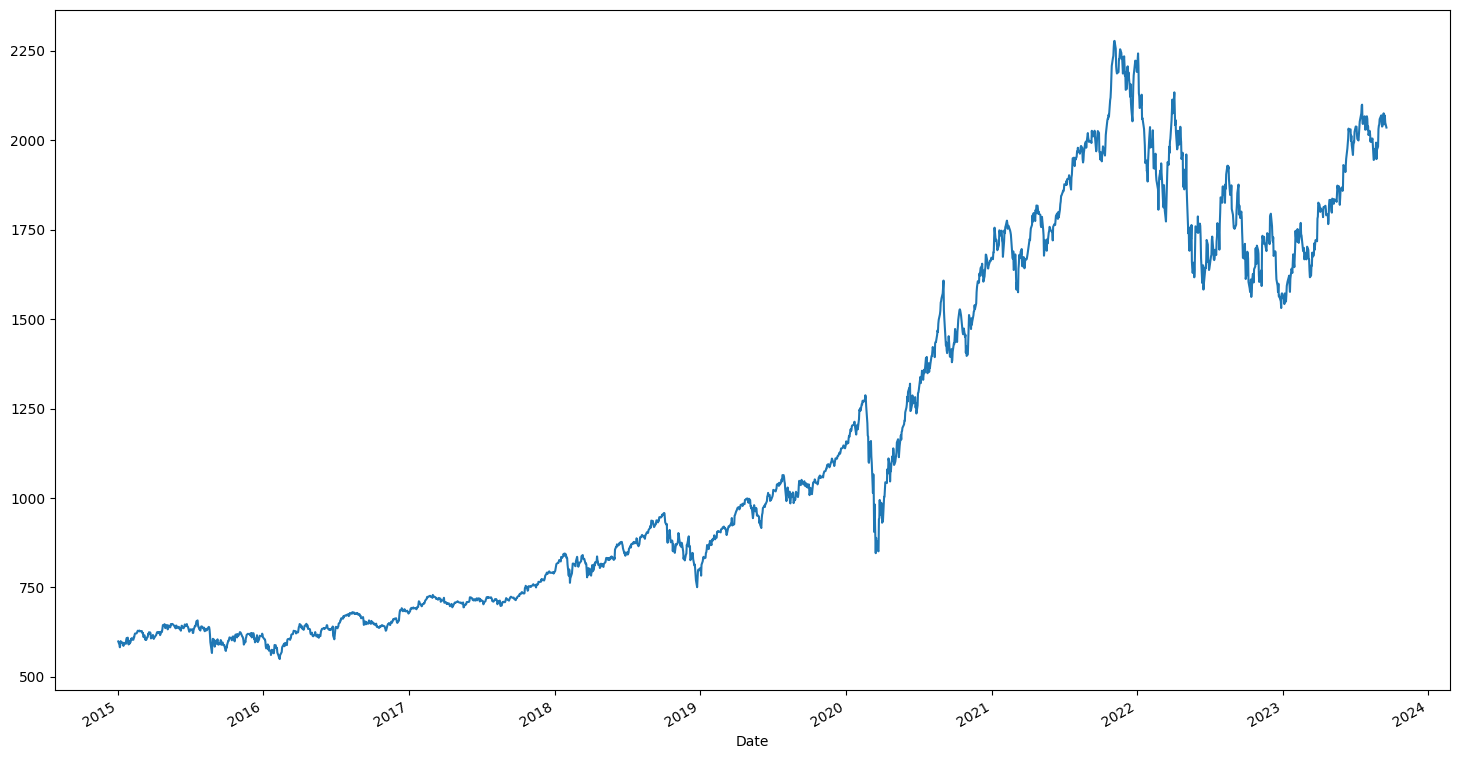

In [39]:
df_sample["Portfolio"] = df_sample.apply(lambda row: row[symbols].sum(), axis=1)
df_sample["Portfolio"].plot(figsize=(18,10))

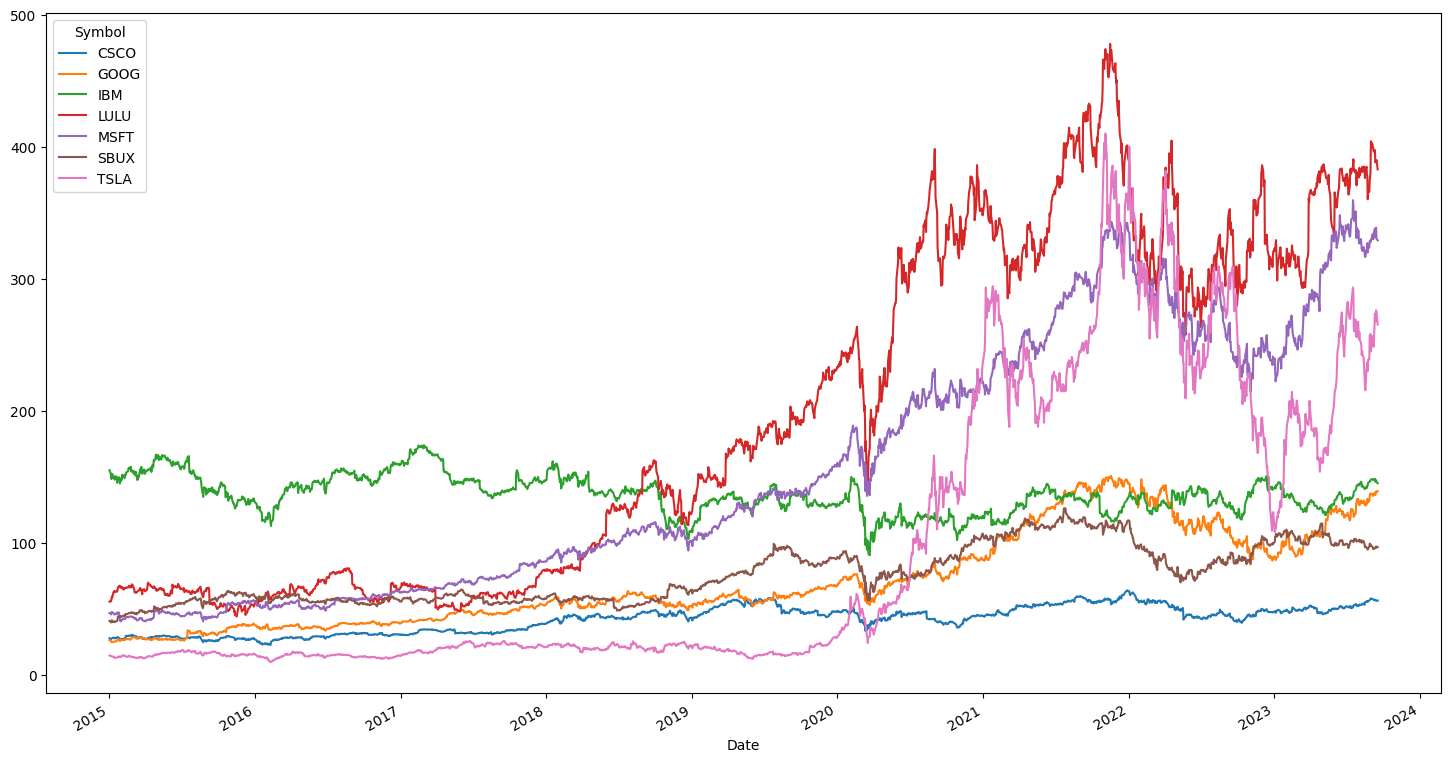

In [40]:
df_sample.drop(["Portfolio", "AAPL", "SPY"], axis=1).plot(figsize=(18,10));

In [41]:
df_normal = df_sample/df_sample.iloc[0]
display(df_normal)

Symbol,AAPL,CSCO,GOOG,IBM,LULU,MSFT,SBUX,SPY,TSLA,Portfolio
Date,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.971828,0.980080,0.979154,0.984265,1.011203,0.990804,0.980845,0.981940,0.957959,0.984609
2015-01-06,0.971920,0.979717,0.956460,0.963038,1.004156,0.976262,0.972863,0.972691,0.963385,0.972744
2015-01-07,0.985548,0.988772,0.954822,0.956744,1.041742,0.988666,0.996807,0.984812,0.961880,0.982274
2015-01-08,1.023415,0.996378,0.957832,0.977539,1.067402,1.017750,1.012893,1.002288,0.960376,1.001557
...,...,...,...,...,...,...,...,...,...,...
2023-09-12,6.450197,2.042376,5.199733,0.944279,7.013372,7.095167,2.363458,2.171007,18.294652,3.413941
2023-09-13,6.373731,2.038392,5.254378,0.945892,7.028731,7.186912,2.380403,2.173539,18.555924,3.430053
2023-09-14,6.429708,2.041651,5.311317,0.951056,7.024575,7.243371,2.386051,2.192280,18.880124,3.455332


<Axes: xlabel='Date'>

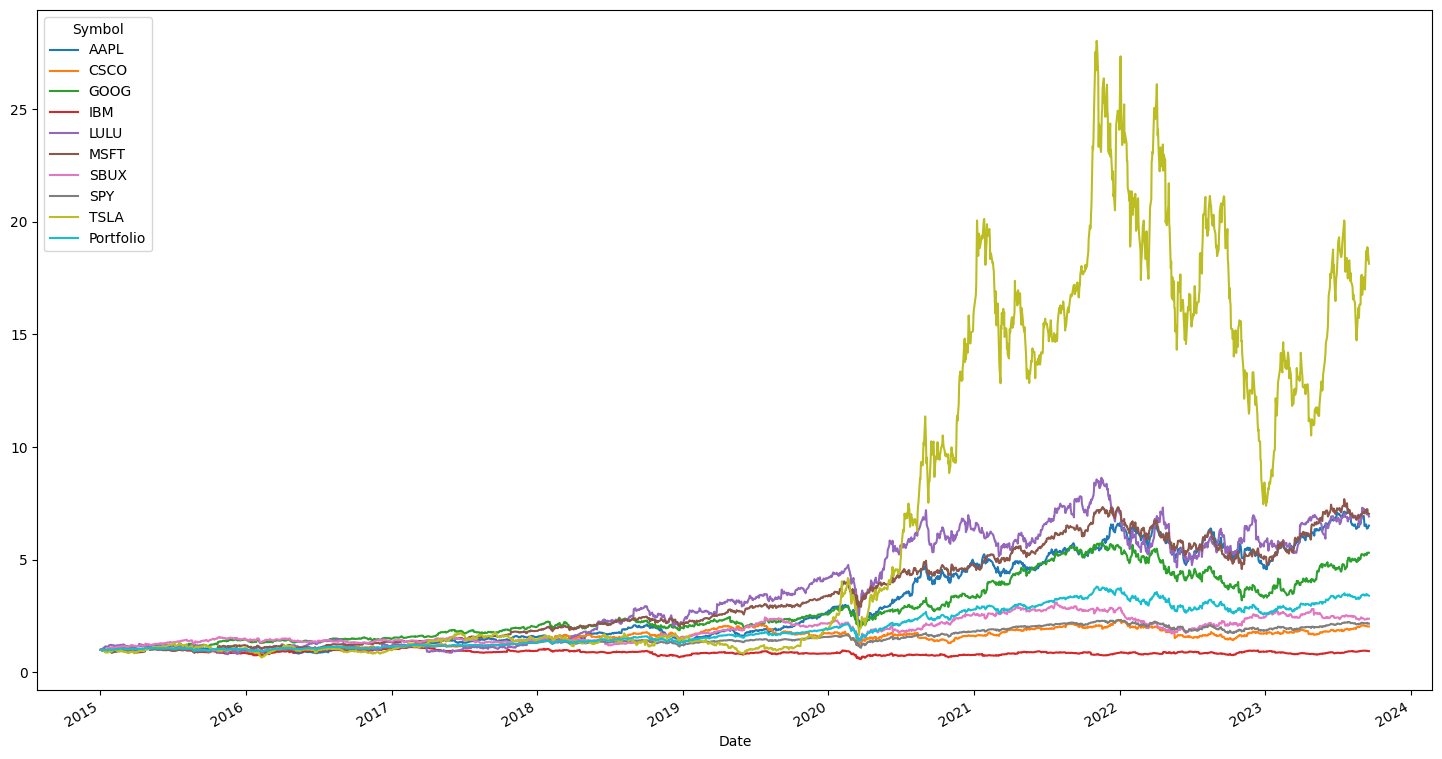

In [42]:
df_normal.plot(figsize=(18,10))

<Axes: xlabel='Date'>

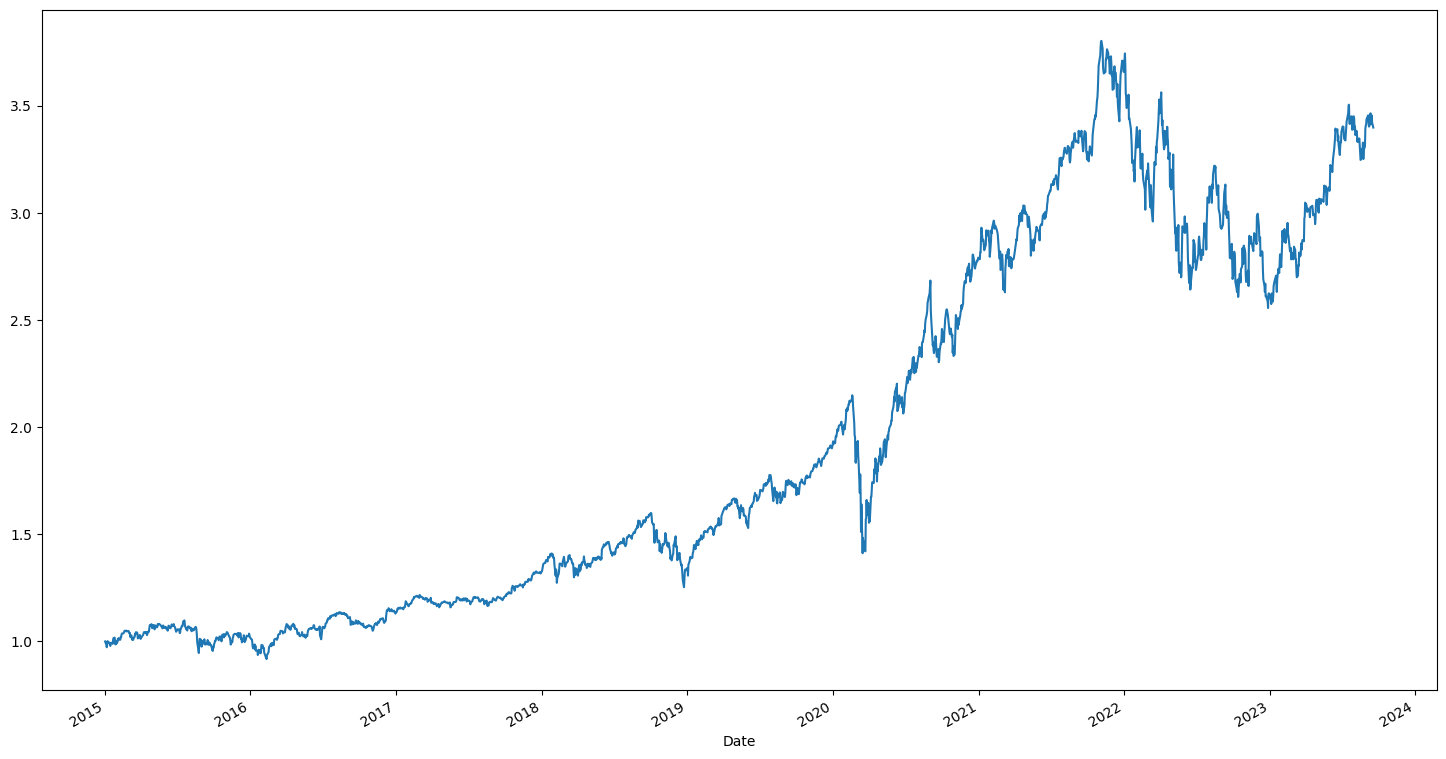

In [43]:
df_normal["Portfolio"].plot(figsize=(18,10))

In [44]:
df_normal.iloc[-1]*100

Symbol
AAPL          651.129611
CSCO          203.223466
GOOG          531.017042
IBM            93.646883
LULU          691.741955
MSFT          703.721155
SBUX          237.622789
SPY           215.951916
TSLA         1814.417899
Portfolio     339.893038
Name: 2023-09-18 00:00:00, dtype: float64